In [3]:
# !pip install super_gradients
import os
import shutil
import random
from tqdm.notebook import tqdm
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val
import torch
from super_gradients.training import models
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 47.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 77.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml

[2024-01-12 11:24:24] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-12 11:24:24] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /root/sg_logs/console.log


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
dataset_params = {
    'data_dir':'../../data',
    'train_images_dir':'images/train',
    'train_labels_dir':'labels/train',
    'val_images_dir':'images/val',
    'val_labels_dir':'labels/val',
    'test_images_dir':'images/val',
    'test_labels_dir':'labels/val',
    'classes': ['face']    
}

In [5]:
MODEL_ARCH = 'yolo_nas_l'
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
MAX_EPOCHS = 20
CHECKPOINT_DIR = f'/home/bazilyq/Рабочий стол/MLSD/'
EXPERIMENT_NAME = f'yolo_nas_face'
     

In [6]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

[2024-01-12 11:24:41] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 13386/13386 [05:07<00:00, 43.60it/s]
[2024-01-12 11:29:49] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 3347/3347 [01:03<00:00, 53.04it/s]
[2024-01-12 11:30:52] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:  94%|█████████▍| 3162/3347 [00:04<00:00, 922.97it/s]

In [9]:
model = models.get(
    MODEL_ARCH, 
    num_classes=len(dataset_params['classes']), 
    pretrained_weights="coco"
)

[2024-01-12 11:31:02] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:08<00:00, 30.0MB/s] 
[2024-01-12 11:31:12] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [10]:
train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}
     

In [11]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

In [12]:
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2024-01-12 11:31:13] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240112_113113_166024`
[2024-01-12 11:31:13] INFO - sg_trainer.py - Checkpoints directory: /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024
[2024-01-12 11:31:13] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/console_Jan12_11_31_13.txt


/opt/conda/lib/python3.10/site-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
/opt/conda/lib/python3.10/site-packages/super_gradients/training/utils/optimizer_utils.py:107: DeprecationWarning: initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
  warnings.warn(
[2024-01-12 11:31:15] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.3764
│   ├── Ppyoloeloss/loss_iou = 0.6669
│   ├── Ppyoloeloss/loss_dfl = 0.6444
│   └── Ppyoloeloss/loss = 2.6878
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.833
    ├── Ppyoloeloss/loss_iou = 0.5011
    ├── Ppyoloeloss/loss_dfl = 0.5093
    ├── Ppyoloeloss/loss = 1.8433
    ├── Precision@0.50 = 0.0774
    ├── Recall@0.50 = 0.8167
    ├── Map@0.50 = 0.6583
    └── F1@0.50 = 0.1414



Validating epoch 1: 100%|██████████| 419/419 [01:26<00:00,  4.86it/s]
[2024-01-12 12:24:04] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 12:24:04] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8220213055610657


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8386
│   │   ├── Epoch N-1      = 1.3764 (↘ -0.5378)
│   │   └── Best until now = 1.3764 (↘ -0.5378)
│   ├── Ppyoloeloss/loss_iou = 0.5302
│   │   ├── Epoch N-1      = 0.6669 (↘ -0.1367)
│   │   └── Best until now = 0.6669 (↘ -0.1367)
│   ├── Ppyoloeloss/loss_dfl = 0.5121
│   │   ├── Epoch N-1      = 0.6444 (↘ -0.1323)
│   │   └── Best until now = 0.6444 (↘ -0.1323)
│   └── Ppyoloeloss/loss = 1.8809
│       ├── Epoch N-1      = 2.6878 (↘ -0.8069)
│       └── Best until now = 2.6878 (↘ -0.8069)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7322
    │   ├── Epoch N-1      = 0.833  (↘ -0.1008)
    │   └── Best until now = 0.833  (↘ -0.1008)
    ├── Ppyoloeloss/loss_iou = 0.4472
    │   ├── Epoch N-1      = 0.5011 (↘ -0.0539)
    │   └── Best until now = 0.5011 (↘ -0.0539)
    ├── Ppyoloeloss/loss_dfl = 0.4464
    │   ├── Epoch N-1      = 0.5093 (↘ -0.0628)
    │   └── Best until now = 0.5093 (↘ -0.0628)
    ├── Ppyoloeloss/lo

Validating epoch 2: 100%|██████████| 419/419 [01:26<00:00,  4.82it/s]


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8217
│   │   ├── Epoch N-1      = 0.8386 (↘ -0.0169)
│   │   └── Best until now = 0.8386 (↘ -0.0169)
│   ├── Ppyoloeloss/loss_iou = 0.524
│   │   ├── Epoch N-1      = 0.5302 (↘ -0.0062)
│   │   └── Best until now = 0.5302 (↘ -0.0062)
│   ├── Ppyoloeloss/loss_dfl = 0.5049
│   │   ├── Epoch N-1      = 0.5121 (↘ -0.0071)
│   │   └── Best until now = 0.5121 (↘ -0.0071)
│   └── Ppyoloeloss/loss = 1.8506
│       ├── Epoch N-1      = 1.8809 (↘ -0.0303)
│       └── Best until now = 1.8809 (↘ -0.0303)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7112
    │   ├── Epoch N-1      = 0.7322 (↘ -0.021)
    │   └── Best until now = 0.7322 (↘ -0.021)
    ├── Ppyoloeloss/loss_iou = 0.4666
    │   ├── Epoch N-1      = 0.4472 (↗ 0.0194)
    │   └── Best until now = 0.4472 (↗ 0.0194)
    ├── Ppyoloeloss/loss_dfl = 0.4598
    │   ├── Epoch N-1      = 0.4464 (↗ 0.0134)
    │   └── Best until now = 0.4464 (↗ 0.0134)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 3: 100%|██████████| 419/419 [01:28<00:00,  4.74it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8244
│   │   ├── Epoch N-1      = 0.8217 (↗ 0.0027)
│   │   └── Best until now = 0.8217 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_iou = 0.5269
│   │   ├── Epoch N-1      = 0.524  (↗ 0.0029)
│   │   └── Best until now = 0.524  (↗ 0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.5089
│   │   ├── Epoch N-1      = 0.5049 (↗ 0.0039)
│   │   └── Best until now = 0.5049 (↗ 0.0039)
│   └── Ppyoloeloss/loss = 1.8602
│       ├── Epoch N-1      = 1.8506 (↗ 0.0096)
│       └── Best until now = 1.8506 (↗ 0.0096)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7257
    │   ├── Epoch N-1      = 0.7112 (↗ 0.0145)
    │   └── Best until now = 0.7112 (↗ 0.0145)
    ├── Ppyoloeloss/loss_iou = 0.4627
    │   ├── Epoch N-1      = 0.4666 (↘ -0.0039)
    │   └── Best until now = 0.4472 (↗ 0.0155)
    ├── Ppyoloeloss/loss_dfl = 0.4646
    │   ├── Epoch N-1      = 0.4598 (↗ 0.0048)
    │   └── Best until now = 0.4464 (↗ 0.0182)
    ├── Ppyoloeloss/loss = 1.653
  

Validating epoch 4: 100%|██████████| 419/419 [01:27<00:00,  4.80it/s]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8083
│   │   ├── Epoch N-1      = 0.8244 (↘ -0.0161)
│   │   └── Best until now = 0.8217 (↘ -0.0134)
│   ├── Ppyoloeloss/loss_iou = 0.5148
│   │   ├── Epoch N-1      = 0.5269 (↘ -0.0122)
│   │   └── Best until now = 0.524  (↘ -0.0092)
│   ├── Ppyoloeloss/loss_dfl = 0.5009
│   │   ├── Epoch N-1      = 0.5089 (↘ -0.008)
│   │   └── Best until now = 0.5049 (↘ -0.004)
│   └── Ppyoloeloss/loss = 1.824
│       ├── Epoch N-1      = 1.8602 (↘ -0.0362)
│       └── Best until now = 1.8506 (↘ -0.0267)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7723
    │   ├── Epoch N-1      = 0.7257 (↗ 0.0466)
    │   └── Best until now = 0.7112 (↗ 0.0611)
    ├── Ppyoloeloss/loss_iou = 0.4646
    │   ├── Epoch N-1      = 0.4627 (↗ 0.0019)
    │   └── Best until now = 0.4472 (↗ 0.0174)
    ├── Ppyoloeloss/loss_dfl = 0.4693
    │   ├── Epoch N-1      = 0.4646 (↗ 0.0047)
    │   └── Best until now = 0.4464 (↗ 0.0229)
    ├── Ppyoloeloss/loss = 1.70

Validating epoch 5: 100%|██████████| 419/419 [01:26<00:00,  4.82it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8022
│   │   ├── Epoch N-1      = 0.8083 (↘ -0.0061)
│   │   └── Best until now = 0.8083 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_iou = 0.5101
│   │   ├── Epoch N-1      = 0.5148 (↘ -0.0046)
│   │   └── Best until now = 0.5148 (↘ -0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.4989
│   │   ├── Epoch N-1      = 0.5009 (↘ -0.002)
│   │   └── Best until now = 0.5009 (↘ -0.002)
│   └── Ppyoloeloss/loss = 1.8112
│       ├── Epoch N-1      = 1.824  (↘ -0.0128)
│       └── Best until now = 1.824  (↘ -0.0128)
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.6067
    │   ├── Epoch N-1      = 0.7723 (↗ 1.8344)
    │   └── Best until now = 0.7112 (↗ 1.8955)
    ├── Ppyoloeloss/loss_iou = 0.4603
    │   ├── Epoch N-1      = 0.4646 (↘ -0.0043)
    │   └── Best until now = 0.4472 (↗ 0.0131)
    ├── Ppyoloeloss/loss_dfl = 0.4647
    │   ├── Epoch N-1      = 0.4693 (↘ -0.0046)
    │   └── Best until now = 0.4464 (↗ 0.0183)
    ├── Ppyoloeloss/loss = 3

Validating epoch 6: 100%|██████████| 419/419 [01:26<00:00,  4.83it/s]


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7914
│   │   ├── Epoch N-1      = 0.8022 (↘ -0.0108)
│   │   └── Best until now = 0.8022 (↘ -0.0108)
│   ├── Ppyoloeloss/loss_iou = 0.5021
│   │   ├── Epoch N-1      = 0.5101 (↘ -0.008)
│   │   └── Best until now = 0.5101 (↘ -0.008)
│   ├── Ppyoloeloss/loss_dfl = 0.4938
│   │   ├── Epoch N-1      = 0.4989 (↘ -0.005)
│   │   └── Best until now = 0.4989 (↘ -0.005)
│   └── Ppyoloeloss/loss = 1.7873
│       ├── Epoch N-1      = 1.8112 (↘ -0.0239)
│       └── Best until now = 1.8112 (↘ -0.0239)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7275
    │   ├── Epoch N-1      = 2.6067 (↘ -1.8792)
    │   └── Best until now = 0.7112 (↗ 0.0163)
    ├── Ppyoloeloss/loss_iou = 0.4865
    │   ├── Epoch N-1      = 0.4603 (↗ 0.0262)
    │   └── Best until now = 0.4472 (↗ 0.0393)
    ├── Ppyoloeloss/loss_dfl = 0.4826
    │   ├── Epoch N-1      = 0.4647 (↗ 0.0179)
    │   └── Best until now = 0.4464 (↗ 0.0361)
    ├── Ppyoloeloss/loss = 1.69

Validating epoch 7: 100%|██████████| 419/419 [01:27<00:00,  4.80it/s]
[2024-01-12 14:58:13] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 14:58:13] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8262791633605957


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7829
│   │   ├── Epoch N-1      = 0.7914 (↘ -0.0085)
│   │   └── Best until now = 0.7914 (↘ -0.0085)
│   ├── Ppyoloeloss/loss_iou = 0.496
│   │   ├── Epoch N-1      = 0.5021 (↘ -0.0061)
│   │   └── Best until now = 0.5021 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.4893
│   │   ├── Epoch N-1      = 0.4938 (↘ -0.0046)
│   │   └── Best until now = 0.4938 (↘ -0.0046)
│   └── Ppyoloeloss/loss = 1.7682
│       ├── Epoch N-1      = 1.7873 (↘ -0.0191)
│       └── Best until now = 1.7873 (↘ -0.0191)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7039
    │   ├── Epoch N-1      = 0.7275 (↘ -0.0236)
    │   └── Best until now = 0.7112 (↘ -0.0073)
    ├── Ppyoloeloss/loss_iou = 0.4374
    │   ├── Epoch N-1      = 0.4865 (↘ -0.0491)
    │   └── Best until now = 0.4472 (↘ -0.0098)
    ├── Ppyoloeloss/loss_dfl = 0.4553
    │   ├── Epoch N-1      = 0.4826 (↘ -0.0273)
    │   └── Best until now = 0.4464 (↗ 0.0089)
    ├── Ppyoloeloss/loss

Validating epoch 8: 100%|██████████| 419/419 [01:27<00:00,  4.80it/s]
[2024-01-12 15:23:46] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 15:23:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8377645015716553


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7721
│   │   ├── Epoch N-1      = 0.7829 (↘ -0.0108)
│   │   └── Best until now = 0.7829 (↘ -0.0108)
│   ├── Ppyoloeloss/loss_iou = 0.4894
│   │   ├── Epoch N-1      = 0.496  (↘ -0.0066)
│   │   └── Best until now = 0.496  (↘ -0.0066)
│   ├── Ppyoloeloss/loss_dfl = 0.4843
│   │   ├── Epoch N-1      = 0.4893 (↘ -0.005)
│   │   └── Best until now = 0.4893 (↘ -0.005)
│   └── Ppyoloeloss/loss = 1.7458
│       ├── Epoch N-1      = 1.7682 (↘ -0.0224)
│       └── Best until now = 1.7682 (↘ -0.0224)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6989
    │   ├── Epoch N-1      = 0.7039 (↘ -0.005)
    │   └── Best until now = 0.7039 (↘ -0.005)
    ├── Ppyoloeloss/loss_iou = 0.4422
    │   ├── Epoch N-1      = 0.4374 (↗ 0.0048)
    │   └── Best until now = 0.4374 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.4507
    │   ├── Epoch N-1      = 0.4553 (↘ -0.0046)
    │   └── Best until now = 0.4464 (↗ 0.0043)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 9: 100%|██████████| 419/419 [01:27<00:00,  4.81it/s]
[2024-01-12 15:50:29] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 15:50:29] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8391079306602478


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7631
│   │   ├── Epoch N-1      = 0.7721 (↘ -0.009)
│   │   └── Best until now = 0.7721 (↘ -0.009)
│   ├── Ppyoloeloss/loss_iou = 0.4847
│   │   ├── Epoch N-1      = 0.4894 (↘ -0.0047)
│   │   └── Best until now = 0.4894 (↘ -0.0047)
│   ├── Ppyoloeloss/loss_dfl = 0.4792
│   │   ├── Epoch N-1      = 0.4843 (↘ -0.0051)
│   │   └── Best until now = 0.4843 (↘ -0.0051)
│   └── Ppyoloeloss/loss = 1.727
│       ├── Epoch N-1      = 1.7458 (↘ -0.0188)
│       └── Best until now = 1.7458 (↘ -0.0188)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6979
    │   ├── Epoch N-1      = 0.6989 (↘ -0.001)
    │   └── Best until now = 0.6989 (↘ -0.001)
    ├── Ppyoloeloss/loss_iou = 0.4411
    │   ├── Epoch N-1      = 0.4422 (↘ -0.0012)
    │   └── Best until now = 0.4374 (↗ 0.0036)
    ├── Ppyoloeloss/loss_dfl = 0.4491
    │   ├── Epoch N-1      = 0.4507 (↘ -0.0016)
    │   └── Best until now = 0.4464 (↗ 0.0027)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 10: 100%|██████████| 419/419 [01:27<00:00,  4.80it/s]
[2024-01-12 16:16:59] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 16:16:59] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.849292516708374


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7523
│   │   ├── Epoch N-1      = 0.7631 (↘ -0.0108)
│   │   └── Best until now = 0.7631 (↘ -0.0108)
│   ├── Ppyoloeloss/loss_iou = 0.4775
│   │   ├── Epoch N-1      = 0.4847 (↘ -0.0072)
│   │   └── Best until now = 0.4847 (↘ -0.0072)
│   ├── Ppyoloeloss/loss_dfl = 0.4765
│   │   ├── Epoch N-1      = 0.4792 (↘ -0.0027)
│   │   └── Best until now = 0.4792 (↘ -0.0027)
│   └── Ppyoloeloss/loss = 1.7063
│       ├── Epoch N-1      = 1.727  (↘ -0.0206)
│       └── Best until now = 1.727  (↘ -0.0206)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6752
    │   ├── Epoch N-1      = 0.6979 (↘ -0.0228)
    │   └── Best until now = 0.6979 (↘ -0.0228)
    ├── Ppyoloeloss/loss_iou = 0.4353
    │   ├── Epoch N-1      = 0.4411 (↘ -0.0058)
    │   └── Best until now = 0.4374 (↘ -0.0022)
    ├── Ppyoloeloss/loss_dfl = 0.4467
    │   ├── Epoch N-1      = 0.4491 (↘ -0.0024)
    │   └── Best until now = 0.4464 (↗ 0.0003)
    ├── Ppyoloeloss/lo

Validating epoch 11: 100%|██████████| 419/419 [01:27<00:00,  4.80it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7464
│   │   ├── Epoch N-1      = 0.7523 (↘ -0.006)
│   │   └── Best until now = 0.7523 (↘ -0.006)
│   ├── Ppyoloeloss/loss_iou = 0.4747
│   │   ├── Epoch N-1      = 0.4775 (↘ -0.0028)
│   │   └── Best until now = 0.4775 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.4723
│   │   ├── Epoch N-1      = 0.4765 (↘ -0.0042)
│   │   └── Best until now = 0.4765 (↘ -0.0042)
│   └── Ppyoloeloss/loss = 1.6934
│       ├── Epoch N-1      = 1.7063 (↘ -0.0129)
│       └── Best until now = 1.7063 (↘ -0.0129)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6847
    │   ├── Epoch N-1      = 0.6752 (↗ 0.0095)
    │   └── Best until now = 0.6752 (↗ 0.0095)
    ├── Ppyoloeloss/loss_iou = 0.438
    │   ├── Epoch N-1      = 0.4353 (↗ 0.0027)
    │   └── Best until now = 0.4353 (↗ 0.0027)
    ├── Ppyoloeloss/loss_dfl = 0.4431
    │   ├── Epoch N-1      = 0.4467 (↘ -0.0036)
    │   └── Best until now = 0.4464 (↘ -0.0033)
    ├── Ppyoloeloss/loss = 1

Validating epoch 12: 100%|██████████| 419/419 [01:27<00:00,  4.80it/s]
[2024-01-12 17:09:20] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 17:09:20] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.858943521976471


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7371
│   │   ├── Epoch N-1      = 0.7464 (↘ -0.0093)
│   │   └── Best until now = 0.7464 (↘ -0.0093)
│   ├── Ppyoloeloss/loss_iou = 0.4686
│   │   ├── Epoch N-1      = 0.4747 (↘ -0.0061)
│   │   └── Best until now = 0.4747 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.4664
│   │   ├── Epoch N-1      = 0.4723 (↘ -0.0059)
│   │   └── Best until now = 0.4723 (↘ -0.0059)
│   └── Ppyoloeloss/loss = 1.6721
│       ├── Epoch N-1      = 1.6934 (↘ -0.0213)
│       └── Best until now = 1.6934 (↘ -0.0213)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6784
    │   ├── Epoch N-1      = 0.6847 (↘ -0.0063)
    │   └── Best until now = 0.6752 (↗ 0.0032)
    ├── Ppyoloeloss/loss_iou = 0.4271
    │   ├── Epoch N-1      = 0.438  (↘ -0.0109)
    │   └── Best until now = 0.4353 (↘ -0.0082)
    ├── Ppyoloeloss/loss_dfl = 0.4394
    │   ├── Epoch N-1      = 0.4431 (↘ -0.0038)
    │   └── Best until now = 0.4431 (↘ -0.0038)
    ├── Ppyoloeloss/lo

Validating epoch 13: 100%|██████████| 419/419 [01:27<00:00,  4.80it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7227
│   │   ├── Epoch N-1      = 0.7371 (↘ -0.0144)
│   │   └── Best until now = 0.7371 (↘ -0.0144)
│   ├── Ppyoloeloss/loss_iou = 0.4621
│   │   ├── Epoch N-1      = 0.4686 (↘ -0.0065)
│   │   └── Best until now = 0.4686 (↘ -0.0065)
│   ├── Ppyoloeloss/loss_dfl = 0.463
│   │   ├── Epoch N-1      = 0.4664 (↘ -0.0034)
│   │   └── Best until now = 0.4664 (↘ -0.0034)
│   └── Ppyoloeloss/loss = 1.6478
│       ├── Epoch N-1      = 1.6721 (↘ -0.0243)
│       └── Best until now = 1.6721 (↘ -0.0243)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6793
    │   ├── Epoch N-1      = 0.6784 (↗ 0.001)
    │   └── Best until now = 0.6752 (↗ 0.0042)
    ├── Ppyoloeloss/loss_iou = 0.4348
    │   ├── Epoch N-1      = 0.4271 (↗ 0.0078)
    │   └── Best until now = 0.4271 (↗ 0.0078)
    ├── Ppyoloeloss/loss_dfl = 0.439
    │   ├── Epoch N-1      = 0.4394 (↘ -0.0004)
    │   └── Best until now = 0.4394 (↘ -0.0004)
    ├── Ppyoloeloss/loss = 1

Validating epoch 14: 100%|██████████| 419/419 [01:27<00:00,  4.77it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7146
│   │   ├── Epoch N-1      = 0.7227 (↘ -0.0081)
│   │   └── Best until now = 0.7227 (↘ -0.0081)
│   ├── Ppyoloeloss/loss_iou = 0.458
│   │   ├── Epoch N-1      = 0.4621 (↘ -0.0041)
│   │   └── Best until now = 0.4621 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_dfl = 0.4564
│   │   ├── Epoch N-1      = 0.463  (↘ -0.0066)
│   │   └── Best until now = 0.463  (↘ -0.0066)
│   └── Ppyoloeloss/loss = 1.629
│       ├── Epoch N-1      = 1.6478 (↘ -0.0188)
│       └── Best until now = 1.6478 (↘ -0.0188)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.684
    │   ├── Epoch N-1      = 0.6793 (↗ 0.0046)
    │   └── Best until now = 0.6752 (↗ 0.0088)
    ├── Ppyoloeloss/loss_iou = 0.4449
    │   ├── Epoch N-1      = 0.4348 (↗ 0.0101)
    │   └── Best until now = 0.4271 (↗ 0.0178)
    ├── Ppyoloeloss/loss_dfl = 0.4438
    │   ├── Epoch N-1      = 0.439  (↗ 0.0048)
    │   └── Best until now = 0.439  (↗ 0.0048)
    ├── Ppyoloeloss/loss = 1.5

Validating epoch 15: 100%|██████████| 419/419 [01:26<00:00,  4.82it/s]
[2024-01-12 18:28:27] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 18:28:27] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8707889318466187


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7051
│   │   ├── Epoch N-1      = 0.7146 (↘ -0.0094)
│   │   └── Best until now = 0.7146 (↘ -0.0094)
│   ├── Ppyoloeloss/loss_iou = 0.4521
│   │   ├── Epoch N-1      = 0.458  (↘ -0.0058)
│   │   └── Best until now = 0.458  (↘ -0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.4521
│   │   ├── Epoch N-1      = 0.4564 (↘ -0.0044)
│   │   └── Best until now = 0.4564 (↘ -0.0044)
│   └── Ppyoloeloss/loss = 1.6094
│       ├── Epoch N-1      = 1.629  (↘ -0.0196)
│       └── Best until now = 1.629  (↘ -0.0196)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6545
    │   ├── Epoch N-1      = 0.684  (↘ -0.0295)
    │   └── Best until now = 0.6752 (↘ -0.0207)
    ├── Ppyoloeloss/loss_iou = 0.4105
    │   ├── Epoch N-1      = 0.4449 (↘ -0.0344)
    │   └── Best until now = 0.4271 (↘ -0.0166)
    ├── Ppyoloeloss/loss_dfl = 0.4254
    │   ├── Epoch N-1      = 0.4438 (↘ -0.0184)
    │   └── Best until now = 0.439  (↘ -0.0136)
    ├── Ppyoloeloss/l

Validating epoch 16: 100%|██████████| 419/419 [01:26<00:00,  4.83it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6977
│   │   ├── Epoch N-1      = 0.7051 (↘ -0.0074)
│   │   └── Best until now = 0.7051 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_iou = 0.4467
│   │   ├── Epoch N-1      = 0.4521 (↘ -0.0054)
│   │   └── Best until now = 0.4521 (↘ -0.0054)
│   ├── Ppyoloeloss/loss_dfl = 0.4492
│   │   ├── Epoch N-1      = 0.4521 (↘ -0.0029)
│   │   └── Best until now = 0.4521 (↘ -0.0029)
│   └── Ppyoloeloss/loss = 1.5936
│       ├── Epoch N-1      = 1.6094 (↘ -0.0157)
│       └── Best until now = 1.6094 (↘ -0.0157)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6616
    │   ├── Epoch N-1      = 0.6545 (↗ 0.0071)
    │   └── Best until now = 0.6545 (↗ 0.0071)
    ├── Ppyoloeloss/loss_iou = 0.4201
    │   ├── Epoch N-1      = 0.4105 (↗ 0.0096)
    │   └── Best until now = 0.4105 (↗ 0.0096)
    ├── Ppyoloeloss/loss_dfl = 0.4301
    │   ├── Epoch N-1      = 0.4254 (↗ 0.0047)
    │   └── Best until now = 0.4254 (↗ 0.0047)
    ├── Ppyoloeloss/loss = 

Validating epoch 17: 100%|██████████| 419/419 [01:27<00:00,  4.77it/s]
[2024-01-12 19:20:15] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 19:20:15] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8753339052200317


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6896
│   │   ├── Epoch N-1      = 0.6977 (↘ -0.0082)
│   │   └── Best until now = 0.6977 (↘ -0.0082)
│   ├── Ppyoloeloss/loss_iou = 0.4421
│   │   ├── Epoch N-1      = 0.4467 (↘ -0.0047)
│   │   └── Best until now = 0.4467 (↘ -0.0047)
│   ├── Ppyoloeloss/loss_dfl = 0.4454
│   │   ├── Epoch N-1      = 0.4492 (↘ -0.0038)
│   │   └── Best until now = 0.4492 (↘ -0.0038)
│   └── Ppyoloeloss/loss = 1.577
│       ├── Epoch N-1      = 1.5936 (↘ -0.0166)
│       └── Best until now = 1.5936 (↘ -0.0166)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6347
    │   ├── Epoch N-1      = 0.6616 (↘ -0.0269)
    │   └── Best until now = 0.6545 (↘ -0.0198)
    ├── Ppyoloeloss/loss_iou = 0.4129
    │   ├── Epoch N-1      = 0.4201 (↘ -0.0072)
    │   └── Best until now = 0.4105 (↗ 0.0024)
    ├── Ppyoloeloss/loss_dfl = 0.4252
    │   ├── Epoch N-1      = 0.4301 (↘ -0.0048)
    │   └── Best until now = 0.4254 (↘ -0.0002)
    ├── Ppyoloeloss/los

Validating epoch 18: 100%|██████████| 419/419 [01:26<00:00,  4.82it/s]
[2024-01-12 19:45:54] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/yolo_nas_face/RUN_20240112_113113_166024/ckpt_best.pth
[2024-01-12 19:45:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8804467916488647


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6836
│   │   ├── Epoch N-1      = 0.6896 (↘ -0.0059)
│   │   └── Best until now = 0.6896 (↘ -0.0059)
│   ├── Ppyoloeloss/loss_iou = 0.4403
│   │   ├── Epoch N-1      = 0.4421 (↘ -0.0018)
│   │   └── Best until now = 0.4421 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.4425
│   │   ├── Epoch N-1      = 0.4454 (↘ -0.0029)
│   │   └── Best until now = 0.4454 (↘ -0.0029)
│   └── Ppyoloeloss/loss = 1.5664
│       ├── Epoch N-1      = 1.577  (↘ -0.0106)
│       └── Best until now = 1.577  (↘ -0.0106)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6311
    │   ├── Epoch N-1      = 0.6347 (↘ -0.0036)
    │   └── Best until now = 0.6347 (↘ -0.0036)
    ├── Ppyoloeloss/loss_iou = 0.4079
    │   ├── Epoch N-1      = 0.4129 (↘ -0.005)
    │   └── Best until now = 0.4105 (↘ -0.0026)
    ├── Ppyoloeloss/loss_dfl = 0.4221
    │   ├── Epoch N-1      = 0.4252 (↘ -0.0031)
    │   └── Best until now = 0.4252 (↘ -0.0031)
    ├── Ppyoloeloss/lo

Validating epoch 19: 100%|██████████| 419/419 [01:27<00:00,  4.78it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6774
│   │   ├── Epoch N-1      = 0.6836 (↘ -0.0063)
│   │   └── Best until now = 0.6836 (↘ -0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.4372
│   │   ├── Epoch N-1      = 0.4403 (↘ -0.003)
│   │   └── Best until now = 0.4403 (↘ -0.003)
│   ├── Ppyoloeloss/loss_dfl = 0.4398
│   │   ├── Epoch N-1      = 0.4425 (↘ -0.0027)
│   │   └── Best until now = 0.4425 (↘ -0.0027)
│   └── Ppyoloeloss/loss = 1.5544
│       ├── Epoch N-1      = 1.5664 (↘ -0.012)
│       └── Best until now = 1.5664 (↘ -0.012)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6327
    │   ├── Epoch N-1      = 0.6311 (↗ 0.0016)
    │   └── Best until now = 0.6311 (↗ 0.0016)
    ├── Ppyoloeloss/loss_iou = 0.4096
    │   ├── Epoch N-1      = 0.4079 (↗ 0.0017)
    │   └── Best until now = 0.4079 (↗ 0.0017)
    ├── Ppyoloeloss/loss_dfl = 0.4207
    │   ├── Epoch N-1      = 0.4221 (↘ -0.0014)
    │   └── Best until now = 0.4221 (↘ -0.0014)
    ├── Ppyoloeloss/loss = 1.

[2024-01-12 20:11:48] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 20: 100%|██████████| 419/419 [01:26<00:00,  4.83it/s]


In [12]:
model_path = '/home/bazilyq/Рабочий стол/MLSD/photo_anonymization/telegram_bot/models'

best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"{model_path}/average_model.pth"
).to(DEVICE)

[2024-01-13 11:46:49] INFO - checkpoint_utils.py - Successfully loaded model weights from /home/bazilyq/Рабочий стол/MLSD/photo_anonymization/telegram_bot/models/average_model.pth EMA checkpoint.


[2024-01-13 11:53:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


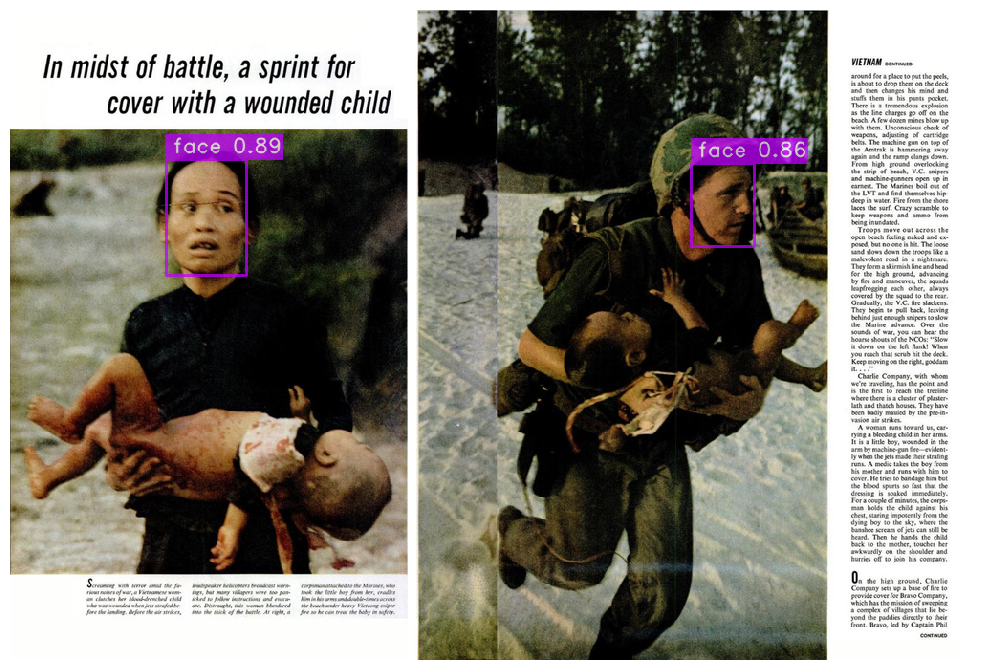

In [22]:
img_name = '0a0bdec4b07ca3c1.jpg'
img_path = f'/home/bazilyq/Рабочий стол/MLSD/photo_anonymization/data/images/val/{img_name}'

best_model.predict(img_path).show()